In [55]:
import pandas as pd
import numpy as np
import csv
import io
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### Reading and Storing Data

In [56]:
df= pd.read_excel('dataset/student_review.xls',index_col=0)
#df=pd.read_csv(io.StringIO(df.to_csv()), index_col=0)
df

,User_id,Course,rating
0,11391,0,2
1,28400,0,2
2,30268,0,0
3,31604,0,2
4,32885,0,2
...,...,...,...
32588,2640965,20,1
32589,2645731,20,3
32590,2648187,20,2
32591,2679821,20,0


In [57]:
df.describe()["rating"]

count    32593.000000
mean         1.253214
std          0.998944
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: rating, dtype: float64

#### Checking for NaN

In [58]:
print("Number of NaN values = "+str(df.isnull().sum()))

Number of NaN values = User_id    0
Course     0
rating     0
dtype: int64


In [59]:
duplicates = df.duplicated(["User_id","Course", "rating"])
print("Number of duplicate rows = "+str(duplicates.sum()))

Number of duplicate rows = 0


In [60]:
print("Total Data:")
print("Total number of movie ratings = "+str(df.shape[0]))
print("Number of unique users = "+str(len(np.unique(df["User_id"]))))
print("Number of unique courses = "+str(len(np.unique(df["Course"]))))

Total Data:
Total number of movie ratings = 32593
Number of unique users = 28785
Number of unique courses = 22


In [61]:
no_user_voted = df.groupby('Course')['rating'].agg('count')

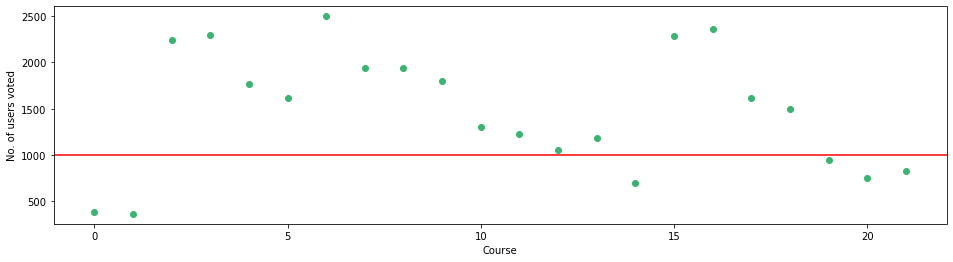

In [62]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=1000,color='r')
plt.xlabel('Course')
plt.ylabel('No. of users voted')
plt.show()

In [36]:
courses_data=pd.DataFrame()
courses=pd.read_csv('dataset/courses.csv')
courses_data['Course']=courses.index.tolist()
courses_data['Course Name']=courses['code_module']+'_'+courses['code_presentation']
courses_data['type']=courses['type']
courses_data

,Course,Course Name,type
0,0,AAA_2013J,Social Science
1,1,AAA_2014J,Social Science
2,2,BBB_2013J,Social Science
3,3,BBB_2014J,Social Science
4,4,BBB_2013B,Social Science
5,5,BBB_2014B,Social Science
6,6,CCC_2014J,STEM
7,7,CCC_2014B,STEM
8,8,DDD_2013J,STEM
9,9,DDD_2014J,STEM


In [35]:
no_user_voted.sort_values(ascending=False)

Course
6     2498
16    2365
3     2292
15    2283
2     2237
8     1938
7     1936
9     1803
4     1767
17    1614
5     1613
18    1500
10    1303
11    1228
13    1188
12    1052
19     952
21     833
20     749
14     694
0      383
1      365
Name: rating, dtype: int64

In [43]:
course_top=courses_data.merge(no_user_voted.to_frame(), left_index=True, right_index=True)
course_top

,Course,Course Name,type,rating
0,0,AAA_2013J,Social Science,383
1,1,AAA_2014J,Social Science,365
2,2,BBB_2013J,Social Science,2237
3,3,BBB_2014J,Social Science,2292
4,4,BBB_2013B,Social Science,1767
5,5,BBB_2014B,Social Science,1613
6,6,CCC_2014J,STEM,2498
7,7,CCC_2014B,STEM,1936
8,8,DDD_2013J,STEM,1938
9,9,DDD_2014J,STEM,1803


In [47]:
course_top.sort_values(by='rating',ascending=False)

,Course,Course Name,type,rating
6,6,CCC_2014J,STEM,2498
16,16,FFF_2014J,STEM,2365
3,3,BBB_2014J,Social Science,2292
15,15,FFF_2013J,STEM,2283
2,2,BBB_2013J,Social Science,2237
8,8,DDD_2013J,STEM,1938
7,7,CCC_2014B,STEM,1936
9,9,DDD_2014J,STEM,1803
4,4,BBB_2013B,Social Science,1767
17,17,FFF_2013B,STEM,1614


In [50]:
avg_user_voted = df.groupby('Course')['rating'].mean()
avg_user_voted

Course
0     1.621410
1     1.578082
2     1.270004
3     1.254363
4     1.256367
5     1.249845
6     1.097678
7     0.977789
8     1.126935
9     1.142540
10    1.101305
11    1.087948
12    1.468631
13    1.450337
14    1.368876
15    1.265878
16    1.219873
17    1.302974
18    1.199333
19    1.700630
20    1.594126
21    1.607443
Name: rating, dtype: float64

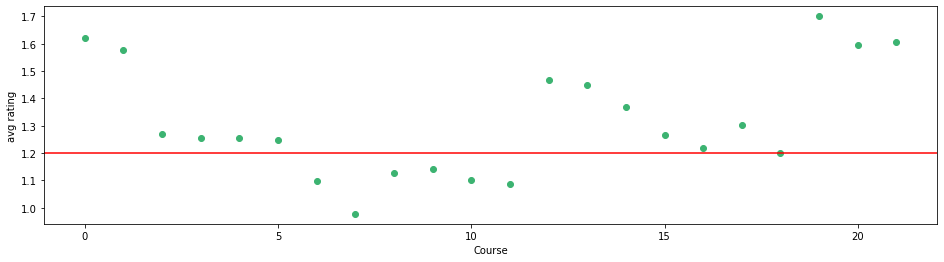

In [54]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(avg_user_voted.index,avg_user_voted,color='mediumseagreen')
plt.axhline(y=1.2,color='r')
plt.xlabel('Course')
plt.ylabel('avg rating')
plt.show()

In [51]:
course_avg=courses_data.merge(avg_user_voted.to_frame(), left_index=True, right_index=True)
course_avg

,Course,Course Name,type,rating
0,0,AAA_2013J,Social Science,1.621410
1,1,AAA_2014J,Social Science,1.578082
2,2,BBB_2013J,Social Science,1.270004
3,3,BBB_2014J,Social Science,1.254363
4,4,BBB_2013B,Social Science,1.256367
5,5,BBB_2014B,Social Science,1.249845
6,6,CCC_2014J,STEM,1.097678
7,7,CCC_2014B,STEM,0.977789
8,8,DDD_2013J,STEM,1.126935
9,9,DDD_2014J,STEM,1.142540


In [52]:
course_avg.sort_values(by='rating',ascending=False)

,Course,Course Name,type,rating
19,19,GGG_2013J,Social Science,1.700630
0,0,AAA_2013J,Social Science,1.621410
21,21,GGG_2014B,Social Science,1.607443
20,20,GGG_2014J,Social Science,1.594126
1,1,AAA_2014J,Social Science,1.578082
12,12,EEE_2013J,STEM,1.468631
13,13,EEE_2014J,STEM,1.450337
14,14,EEE_2014B,STEM,1.368876
17,17,FFF_2013B,STEM,1.302974
2,2,BBB_2013J,Social Science,1.270004


### Dividing the dataset into a train set and a test set

In [9]:
from sklearn.model_selection import train_test_split
Train_Data,Test_Data=train_test_split(df,test_size=0.2)

#### Basic Statistics in Train data

In [10]:
Train_Data.head()

,User_id,Course,rating
28004,442725,16,1
20366,2252437,12,2
27370,630804,18,0
26712,578764,18,2
17382,634278,11,1


In [11]:
print("Total Train Data:")
print("Total number of course ratings in train data = "+str(Train_Data.shape[0]))
print("Number of unique users in train data = "+str(len(np.unique(Train_Data["User_id"]))))
print("Number of unique courses in train data = "+str(len(np.unique(Train_Data["Course"]))))
print("Highest value of a User ID = "+str(max(Train_Data["User_id"].values)))
print("Highest value of a Course ID = "+str(max(Train_Data["Course"].values)))

Total Train Data:
Total number of course ratings in train data = 26074
Number of unique users in train data = 23586
Number of unique courses in train data = 22
Highest value of a User ID = 2716795
Highest value of a Course ID = 21


#### Basic Statistics in Test data

In [12]:
Train_Data.head()

,User_id,Course,rating
28004,442725,16,1
20366,2252437,12,2
27370,630804,18,0
26712,578764,18,2
17382,634278,11,1


In [13]:
print("Total Test Data:")
print("Total number of course ratings in Test data = "+str(Test_Data.shape[0]))
print("Number of unique users in Test data = "+str(len(np.unique(Test_Data["User_id"]))))
print("Number of unique courses in Test data = "+str(len(np.unique(Test_Data["Course"]))))
print("Highest value of a User ID = "+str(max(Test_Data["User_id"].values)))
print("Highest value of a Course ID = "+str(max(Test_Data["Course"].values)))

Total Test Data:
Total number of course ratings in Test data = 6519
Number of unique users in Test data = 6365
Number of unique courses in Test data = 22
Highest value of a User ID = 2698588
Highest value of a Course ID = 21


### Exploratory Data Analysis 

In [14]:
def changingLabels(number):
    return str(number/10**3) + "K"

<ipython-input-15-53920e4cd28f>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([changingLabels(num) for num in ax.get_yticks()])


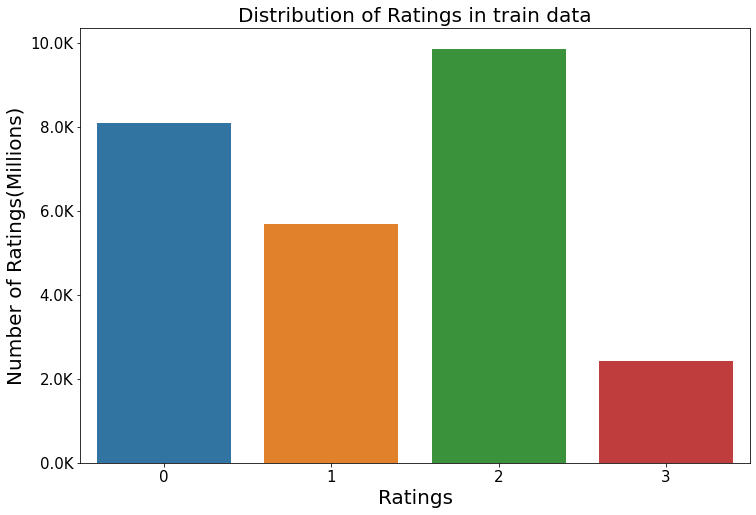

In [15]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x="rating", data=Train_Data)

ax.set_yticklabels([changingLabels(num) for num in ax.get_yticks()])

plt.tick_params(labelsize = 15)
plt.title("Distribution of Ratings in train data", fontsize = 20)
plt.xlabel("Ratings", fontsize = 20)
plt.ylabel("Number of Ratings(Millions)", fontsize = 20)
plt.show()

#### Analysis of Ratings given by user

In [14]:
no_of_rated_courses_per_user = Train_Data.groupby(by = "User_id")["rating"].count().sort_values(ascending = False)

In [15]:
no_of_rated_courses_per_user.head()

User_id
592939     4
584077     4
172965     4
2681198    4
587122     4
Name: rating, dtype: int64

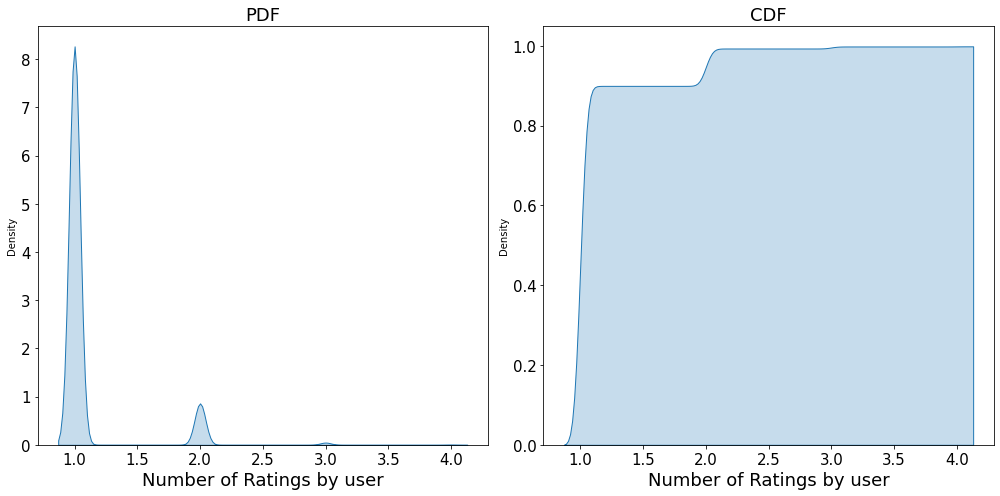

In [16]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(14,7))

sns.kdeplot(no_of_rated_courses_per_user.values, shade = True, ax = axes[0])
axes[0].set_title("PDF", fontsize = 18)
axes[0].set_xlabel("Number of Ratings by user", fontsize = 18)
axes[0].tick_params(labelsize = 15)

sns.kdeplot(no_of_rated_courses_per_user.values, shade = True, cumulative = True, ax = axes[1])
axes[1].set_title("CDF", fontsize = 18)
axes[1].set_xlabel("Number of Ratings by user", fontsize = 18)
axes[1].tick_params(labelsize = 15)

fig.subplots_adjust(wspace=2)
plt.tight_layout()
plt.show()

Above PDF graph shows that almost all of the users give very few ratings. There are very few users who's ratings count is high.
Similarly, above CDF graph shows that almost 99% of users give very few ratings.

In [17]:
print("Information about courses ratings grouped by users:")
no_of_rated_courses_per_user.describe()

Information about courses ratings grouped by users:


count    23599.000000
mean         1.104877
std          0.325709
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: rating, dtype: float64

In [18]:
quantiles = no_of_rated_courses_per_user.quantile(np.arange(0,1.01,0.01))

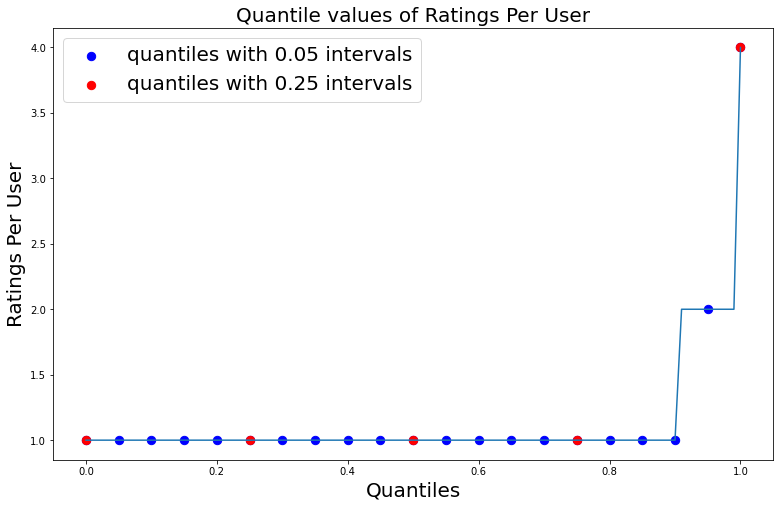

In [19]:
fig = plt.figure(figsize = (10, 6))

axes = fig.add_axes([0.1,0.1,1,1])
axes.set_title("Quantile values of Ratings Per User", fontsize = 20)
axes.set_xlabel("Quantiles", fontsize = 20)
axes.set_ylabel("Ratings Per User", fontsize = 20)
axes.plot(quantiles)

plt.scatter(x = quantiles.index[::5], y = quantiles.values[::5], c = "blue", s = 70, label="quantiles with 0.05 intervals")
plt.scatter(x = quantiles.index[::25], y = quantiles.values[::25], c = "red", s = 70, label="quantiles with 0.25 intervals")
plt.legend(loc='upper left', fontsize = 20)



In [20]:
quantiles[::5]

0.00    1.0
0.05    1.0
0.10    1.0
0.15    1.0
0.20    1.0
0.25    1.0
0.30    1.0
0.35    1.0
0.40    1.0
0.45    1.0
0.50    1.0
0.55    1.0
0.60    1.0
0.65    1.0
0.70    1.0
0.75    1.0
0.80    1.0
0.85    1.0
0.90    1.0
0.95    2.0
1.00    4.0
Name: rating, dtype: float64

In [21]:
print("Total number of ratings below 75th percentile = "+str(sum(no_of_rated_courses_per_user.values<=1)))
print("Total number of ratings above 75th percentile = "+str(sum(no_of_rated_courses_per_user.values>1)))

Total number of ratings below 75th percentile = 21260
Total number of ratings above 75th percentile = 2339


#### Analysis of Ratings Per Course

In [22]:
no_of_ratings_per_course = Train_Data.groupby(by = "Course")["rating"].count().sort_values(ascending = False)

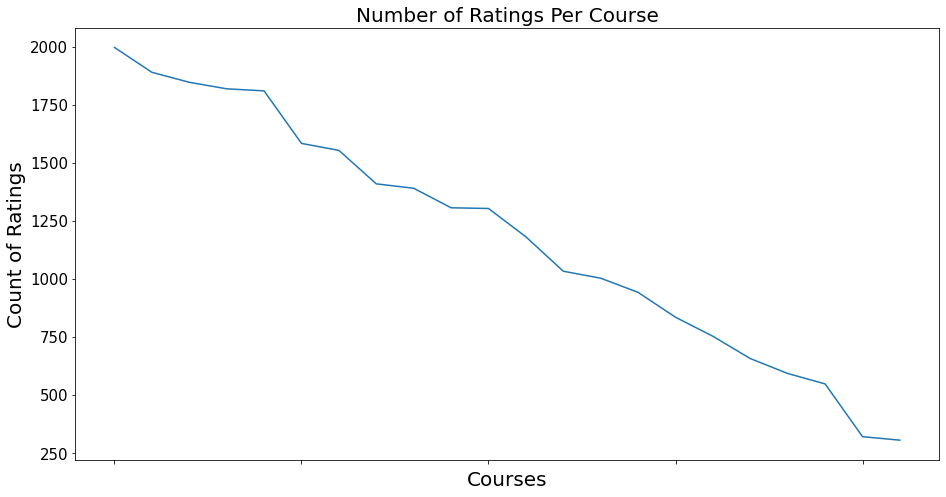

In [23]:
fig = plt.figure(figsize = (12, 6))
axes = fig.add_axes([0.1,0.1,1,1])
plt.title("Number of Ratings Per Course", fontsize = 20)
plt.xlabel("Courses", fontsize = 20)
plt.ylabel("Count of Ratings", fontsize = 20)
plt.plot(no_of_ratings_per_course.values)
plt.tick_params(labelsize = 15)
axes.set_xticklabels([])
plt.show()

It clearly shows that there are some courses which are very popular and were rated by many users as comapared to other courses

### Creating USER-ITEM sparse matrix from data frame

In [24]:
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error

In [25]:
TrainUISparseData = sparse.csr_matrix((Train_Data.rating, (Train_Data.User_id, Train_Data.Course)))

In [26]:
TestUISparseData = sparse.csr_matrix((Test_Data.rating, (Test_Data.User_id, Test_Data.Course)))

In [27]:
rows,cols = TrainUISparseData.shape
presentElements = TrainUISparseData.count_nonzero()

print("Sparsity Of Train matrix : {}% ".format((1-(presentElements/(rows*cols)))*100))

Sparsity Of Train matrix : 99.97000644743427% 


In [28]:
rows,cols = TestUISparseData.shape
presentElements = TestUISparseData.count_nonzero()

print("Sparsity Of Test matrix : {}% ".format((1-(presentElements/(rows*cols)))*100))

Sparsity Of Test matrix : 99.99241488296164% 


Finding Global average of all course ratings, Average rating per user, and Average rating per course

In [29]:
def getAverageRatings(sparseMatrix, if_user):
    ax = 1 if if_user else 0
    #axis = 1 means rows and axis = 0 means columns 
    sumOfRatings = sparseMatrix.sum(axis = ax).A1  #this will give an array of sum of all the ratings of user if axis = 1 else 
    #sum of all the ratings of movies if axis = 0
    noOfRatings = (sparseMatrix!=0).sum(axis = ax).A1  #this will give a boolean True or False array, and True means 1 and False 
    #means 0, and further we are summing it to get the count of all the non-zero cells means length of non-zero cells
    rows, cols = sparseMatrix.shape
    averageRatings = {i: sumOfRatings[i]/noOfRatings[i] for i in range(rows if if_user else cols) if noOfRatings[i]!=0}
    return averageRatings

In [30]:
#Global Average Rating
Global_Average_Rating = TrainUISparseData.sum()/TrainUISparseData.count_nonzero()
print("Global Average Rating {}".format(Global_Average_Rating))

Global Average Rating 1.8232833156691024


In [31]:
AvgRatingUser = getAverageRatings(TrainUISparseData, True)
AvgRatingCourse = getAverageRatings(TrainUISparseData, False)

C:\Users\Win10\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Win10\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


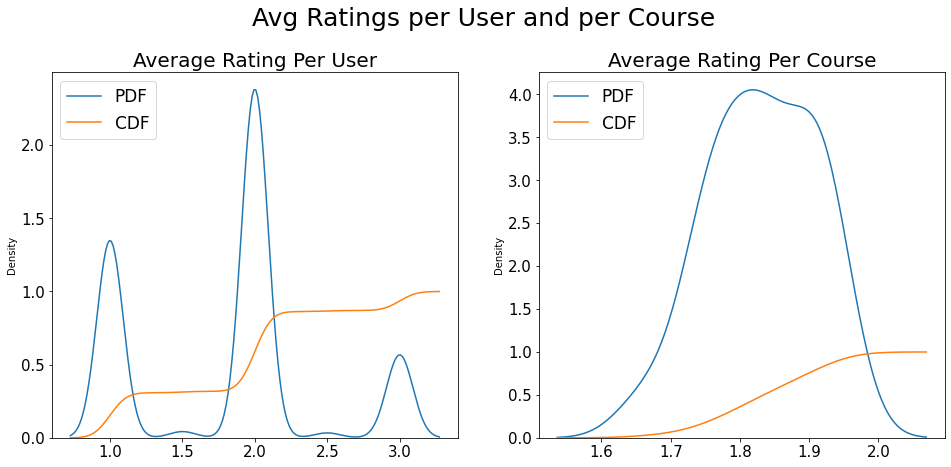

In [32]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 7))
fig.suptitle('Avg Ratings per User and per Course', fontsize=25)

user_average = [rats for rats in AvgRatingUser.values()]
sns.distplot(user_average, hist = False, ax = axes[0], label = "PDF")
sns.kdeplot(user_average, cumulative = True, ax = axes[0], label = "CDF")
axes[0].set_title("Average Rating Per User", fontsize=20)
axes[0].tick_params(labelsize = 15)
axes[0].legend(loc='upper left', fontsize = 17)

course_average = [ratm for ratm in AvgRatingCourse.values()]
sns.distplot(course_average, hist = False, ax = axes[1], label = "PDF")
sns.kdeplot(course_average, cumulative = True, ax = axes[1], label = "CDF")
axes[1].set_title("Average Rating Per Course", fontsize=20)
axes[1].tick_params(labelsize = 15)
axes[1].legend(loc='upper left', fontsize = 17)

plt.subplots_adjust(wspace=0.2, top=0.85)
plt.show()

### Cold Start Problem

In [33]:
#Cold Start Problem with Users
total_users = len(np.unique(df["User_id"]))
train_users = len(np.unique(Train_Data["User_id"]))
uncommonUsers = total_users - train_users
                  
print("Total number of Users = {}".format(total_users))
print("Number of Users in train data= {}".format(train_users))
print("Number of Users not present in train data = {}({}%)".format(uncommonUsers, np.round((uncommonUsers/total_users)*100), 2))

Total number of Users = 28785
Number of Users in train data= 23599
Number of Users not present in train data = 5186(18.0%)


In [34]:
#Cold Start Problem with Courses
total_courses = len(np.unique(df["Course"]))
train_courses = len(np.unique(Train_Data["Course"]))
uncommonCourses = total_courses - train_courses
                  
print("Total number of Courses = {}".format(total_courses))
print("Number of Courses in train data= {}".format(train_courses))
print("Number of Courses not present in train data = {}({}%)".format(uncommonCourses, np.round((uncommonCourses/total_courses)*100), 2))

Total number of Courses = 22
Number of Courses in train data= 22
Number of Courses not present in train data = 0(0.0%)


### Computing Similarity Matrices

In [35]:
row_index, col_index = TrainUISparseData.nonzero()
rows = np.unique(row_index)
for i in rows[:100]:
    print(i)

6516
11391
23629
24213
24391
24734
25107
26192
26211
26247
26315
26915
27683
27759
27780
27891
27935
28046
28061
28400
28418
28787
28808
28897
29144
29335
29411
29420
29639
29769
29820
30091
30096
30531
30549
30850
31107
31161
31173
31205
31296
31604
31849
32221
32885
32930
33387
33915
33930
34229
34353
34653
34863
35340
35355
35508
35796
35812
35860
36347
37298
37622
37652
38053
38941
39655
39660
39882
40184
40419
40563
41060
41414
41489
41547
42552
42638
42668
42746
42818
43273
43564
43958
45423
45462
45642
45664
46148
46753
46844
47061
47861
47891
47924
48040
48152
48503
48635
49119
49123


In [36]:
from datetime import *
import time

In [37]:
#Here, we are calculating user-user similarity matrix only for first 100 users in our sparse matrix. And we are calculating 
#top 100 most similar users with them.
def getUser_UserSimilarity(sparseMatrix, top = 100):
    startTimestamp20 = datetime.now()  
    
    row_index, col_index = sparseMatrix.nonzero()  #this will give indices of rows in "row_index" and indices of columns in 
    #"col_index" where there is a non-zero value exist.
    rows = np.unique(row_index)
    similarMatrix = np.zeros(5100000).reshape(51000,100)    # 617re building similarity matrix only 
    #for top 100 most similar users.*100 = 61700. As we a
    timeTaken = []
    howManyDone = 0
    for row in rows[:top]:
        howManyDone += 1
        startTimestamp = datetime.now().timestamp()  #it will give seconds elapsed
        sim = cosine_similarity(sparseMatrix.getrow(row), sparseMatrix).ravel()
        top100_similar_indices = sim.argsort()[-top:]
        top100_similar = sim[top100_similar_indices]
        similarMatrix[row] = top100_similar
        timeforOne = datetime.now().timestamp() - startTimestamp
        timeTaken.append(timeforOne)
        if howManyDone % 20 == 0:
            print("Time elapsed for {} users = {}sec".format(howManyDone, (datetime.now() - startTimestamp20)))
    print("Average Time taken to compute similarity matrix for 1 user = "+str(sum(timeTaken)/len(timeTaken))+"seconds")
    
    fig = plt.figure(figsize = (12,8))
    plt.plot(timeTaken, label = 'Time Taken For Each User')
    plt.plot(np.cumsum(timeTaken), label='Cumulative Time')
    plt.legend(loc='upper left', fontsize = 15)
    plt.xlabel('Users', fontsize = 20)
    plt.ylabel('Time(Seconds)', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.show()
    m_m_similarity = cosine_similarity(TrainUISparseData.T, dense_output = False)
    return similarMatrix

Time elapsed for 20 users = 0:00:01.434278sec
Time elapsed for 40 users = 0:00:02.849517sec
Time elapsed for 60 users = 0:00:04.279717sec
Time elapsed for 80 users = 0:00:05.698311sec
Time elapsed for 100 users = 0:00:07.108731sec
Average Time taken to compute similarity matrix for 1 user = 0.07103885173797607seconds


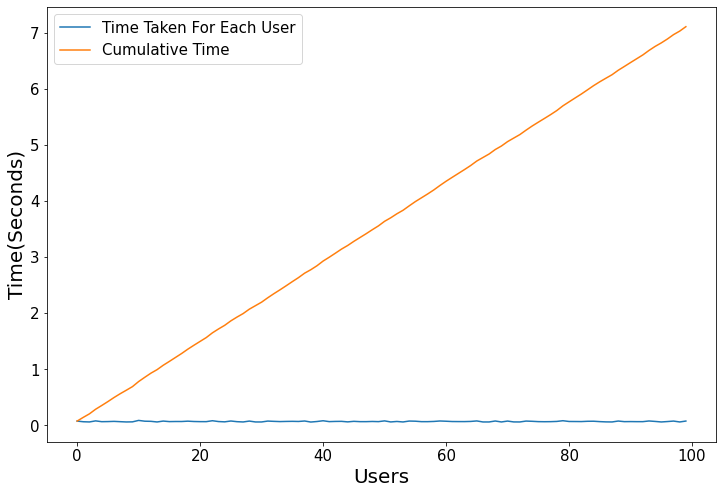

In [38]:
simMatrix = getUser_UserSimilarity(TrainUISparseData, 100)

There are 23570 Users in the training data.

Average time taken to compute similarity matrix for one user is 0.077 sec.

For 23570 users:

23579*0.77 == 1814.89s == 0.5hour


In [39]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from surprise import Dataset
from surprise import Reader


In [40]:
Mean = Train_Data.groupby(by="User_id",as_index=False)['rating'].mean()

In [41]:
Rating_avg = pd.merge(Train_Data,Mean,on='User_id')

In [42]:
Rating_avg

,User_id,Course,rating_x,rating_y
0,285567,5,2,2.0
1,550865,10,2,2.0
2,163120,15,2,2.0
3,493515,4,1,1.0
4,51576,15,3,1.0
...,...,...,...,...
26069,613200,2,2,2.0
26070,330530,12,0,0.0
26071,487371,2,2,2.0
26072,2663010,8,2,2.0


In [43]:
Rating_avg['adg_rating']=Rating_avg['rating_x']-Rating_avg['rating_y']
Rating_avg.head()

,User_id,Course,rating_x,rating_y,adg_rating
0,285567,5,2,2.0,0.0
1,550865,10,2,2.0,0.0
2,163120,15,2,2.0,0.0
3,493515,4,1,1.0,0.0
4,51576,15,3,1.0,2.0


In [44]:
from sklearn.metrics.pairwise import cosine_similarity
final=pd.pivot_table(Rating_avg,values='adg_rating',index='User_id',columns='Course')
final

Course,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
User_id,,,,,,,,,,,,,,,,,,,,,
6516,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11391,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23629,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23632,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698577,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2698588,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2707979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# Replacing NaN by  Average
final_course = final.fillna(final.mean(axis=0))
final_course.head()

Course,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
User_id,,,,,,,,,,,,,,,,,,,,,
6516,-0.051402,0.000000,-0.010411,0.006876,-0.016187,0.01391,-0.124165,-0.158886,0.006475,0.045008,...,0.154391,0.061306,0.151308,0.010202,0.029645,-0.014582,0.046147,0.015936,0.001686,0.00761
11391,0.000000,0.052288,-0.010411,0.006876,-0.016187,0.01391,-0.124165,-0.158886,0.006475,0.045008,...,0.154391,0.061306,0.151308,0.010202,0.029645,-0.014582,0.046147,0.015936,0.001686,0.00761
23629,-0.051402,0.052288,-0.010411,0.006876,0.000000,0.01391,-0.124165,-0.158886,0.006475,0.045008,...,0.154391,0.061306,0.151308,0.010202,0.029645,-0.014582,0.046147,0.015936,0.001686,0.00761
23632,-0.051402,0.052288,0.000000,0.006876,-0.016187,0.01391,-0.124165,-0.158886,0.006475,0.045008,...,0.154391,0.061306,0.151308,0.010202,0.029645,-0.014582,0.046147,0.015936,0.001686,0.00761
24213,-0.051402,0.052288,-0.010411,0.006876,-0.016187,0.01391,-0.124165,-0.158886,0.006475,0.045008,...,0.154391,0.061306,0.151308,0.010202,0.029645,-0.014582,0.046147,0.015936,0.001686,0.00761


In [46]:
final_user = final.apply(lambda row: row.fillna(row.mean()), axis=1)
final_user.head()

Course,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
User_id,,,,,,,,,,,,,,,,,,,,,
6516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# user similarity on replacing NAN by item avg
cosine = cosine_similarity(final_course)
np.fill_diagonal(cosine, 0 )
similarity_with_user =pd.DataFrame(cosine,index=final_course.index)
similarity_with_user.columns=final_course.index
similarity_with_user.head()

User_id,6516,11391,23629,23632,24213,24391,24734,25107,25261,25572,...,2698109,2698125,2698251,2698257,2698535,2698577,2698588,2707979,2710343,2716795
User_id,,,,,,,,,,,,,,,,,,,,,
6516,0.000000,0.973487,0.985468,0.986236,0.294911,0.985508,1.000000,0.985468,0.906491,0.976604,...,0.976604,0.986258,0.980617,0.973487,0.801000,0.986542,0.986542,0.986773,0.980612,0.976604
11391,0.973487,0.000000,0.985917,0.986684,0.294977,0.985957,0.973487,0.985917,0.907049,0.977065,...,0.977065,0.986705,0.981072,1.000000,0.800838,0.986989,0.986989,0.987220,0.981067,0.977065
23629,0.985468,0.985917,0.000000,0.998218,0.296670,0.997515,0.985468,1.000000,0.921400,0.988923,...,0.988923,0.998238,0.992795,0.985917,0.796758,0.998512,0.998512,0.998736,0.992790,0.988923
23632,0.986236,0.986684,0.998218,0.000000,0.296779,0.998256,0.986236,0.998218,0.922319,0.989684,...,0.989684,0.998978,0.993546,0.986684,0.796501,0.999252,0.999252,0.999475,0.993542,0.989684
24213,0.294911,0.294977,0.296670,0.296779,0.000000,0.296675,0.294911,0.296670,0.285927,0.295415,...,0.295415,0.296782,0.223232,0.294977,0.193898,0.296822,0.296822,0.294788,0.221151,0.295415


In [48]:
courses_data=pd.DataFrame()
courses=pd.read_csv('dataset/courses.csv')
courses_data['Course']=courses.index.tolist()
courses_data['Course Name']=courses['code_module']+'_'+courses['code_presentation']
courses_data['type']=courses['type']
courses_data

,Course,Course Name,type
0,0,AAA_2013J,Social Science
1,1,AAA_2014J,Social Science
2,2,BBB_2013J,Social Science
3,3,BBB_2014J,Social Science
4,4,BBB_2013B,Social Science
5,5,BBB_2014B,Social Science
6,6,CCC_2014J,STEM
7,7,CCC_2014B,STEM
8,8,DDD_2013J,STEM
9,9,DDD_2014J,STEM


In [49]:
def find_n_neighbours(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False)
           .iloc[:n].index, 
          index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

In [50]:
# top 30 neighbours for each user
sim_user_30_u = find_n_neighbours(similarity_with_user,30)
sim_user_30_u.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,...,top21,top22,top23,top24,top25,top26,top27,top28,top29,top30
User_id,,,,,,,,,,,,,,,,,,,,,
6516,243510,263251,329659,328734,2509639,676546,1511033,2514368,2514898,200804,...,85092,315744,527100,315076,313937,205494,2540168,311659,311235,310412
11391,279572,1860318,343446,344282,345357,550383,1746134,175991,175932,1765788,...,168936,167906,77367,1729319,342972,342514,183096,1640609,324282,74372
23629,354815,560160,545376,495856,154125,511050,560319,560185,153212,560170,...,495913,2205383,152153,333837,151697,560005,545340,367348,560455,367609
23632,590325,587564,587223,587285,289753,587297,289965,587349,587423,530112,...,587219,587155,293754,586890,285050,530841,586720,586742,586836,286690
24213,524137,1962854,513687,879295,240755,539186,555446,474153,117435,2002727,...,2343809,505815,630200,620243,386671,2436400,614265,601082,440103,317801


In [51]:
# user similarity on replacing NAN by item avg
cosine = cosine_similarity(final_course)
np.fill_diagonal(cosine, 0 )
similarity_with_course = pd.DataFrame(cosine,index=final_course.index)
similarity_with_course.columns=final_user.index
similarity_with_course.head()

User_id,6516,11391,23629,23632,24213,24391,24734,25107,25261,25572,...,2698109,2698125,2698251,2698257,2698535,2698577,2698588,2707979,2710343,2716795
User_id,,,,,,,,,,,,,,,,,,,,,
6516,0.000000,0.973487,0.985468,0.986236,0.294911,0.985508,1.000000,0.985468,0.906491,0.976604,...,0.976604,0.986258,0.980617,0.973487,0.801000,0.986542,0.986542,0.986773,0.980612,0.976604
11391,0.973487,0.000000,0.985917,0.986684,0.294977,0.985957,0.973487,0.985917,0.907049,0.977065,...,0.977065,0.986705,0.981072,1.000000,0.800838,0.986989,0.986989,0.987220,0.981067,0.977065
23629,0.985468,0.985917,0.000000,0.998218,0.296670,0.997515,0.985468,1.000000,0.921400,0.988923,...,0.988923,0.998238,0.992795,0.985917,0.796758,0.998512,0.998512,0.998736,0.992790,0.988923
23632,0.986236,0.986684,0.998218,0.000000,0.296779,0.998256,0.986236,0.998218,0.922319,0.989684,...,0.989684,0.998978,0.993546,0.986684,0.796501,0.999252,0.999252,0.999475,0.993542,0.989684
24213,0.294911,0.294977,0.296670,0.296779,0.000000,0.296675,0.294911,0.296670,0.285927,0.295415,...,0.295415,0.296782,0.223232,0.294977,0.193898,0.296822,0.296822,0.294788,0.221151,0.295415


In [59]:
# top 30 neighbours for each user
sim_user_30_c = find_n_neighbours(similarity_with_course,30)
sim_user_30_c.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,...,top21,top22,top23,top24,top25,top26,top27,top28,top29,top30
User_id,,,,,,,,,,,,,,,,,,,,,
6516,243510,263251,329659,328734,2509639,676546,1511033,2514368,2514898,200804,...,85092,315744,527100,315076,313937,205494,2540168,311659,311235,310412
11391,279572,1860318,343446,344282,345357,550383,1746134,175991,175932,1765788,...,168936,167906,77367,1729319,342972,342514,183096,1640609,324282,74372
23629,354815,560160,545376,495856,154125,511050,560319,560185,153212,560170,...,495913,2205383,152153,333837,151697,560005,545340,367348,560455,367609
23632,590325,587564,587223,587285,289753,587297,289965,587349,587423,530112,...,587219,587155,293754,586890,285050,530841,586720,586742,586836,286690
24213,524137,1962854,513687,879295,240755,539186,555446,474153,117435,2002727,...,2343809,505815,630200,620243,386671,2436400,614265,601082,440103,317801


In [53]:
def get_user_similar_course( user1, user2 ):
    common_courses = Rating_avg[Rating_avg.User_id == user1].merge(
    Rating_avg[Rating_avg.User_id == user2],
    on = "Course",
    how = "inner" )
    return common_courses.merge(courses_data, on = 'Course' )

In [55]:
a = get_user_similar_course(6516,243510)
a = a.loc[ : , ['rating_x_x','rating_x_y','Course Name']]
a.head()

,rating_x_x,rating_x_y,Course Name
0,2,1,AAA_2014J


In [61]:
def User_item_score(user,item):
    a = sim_user_30_c[sim_user_30_c.index==user].values
    b = a.squeeze().tolist()
    c = final_course.loc[:,item]
    d = c[c.index.isin(b)]
    f = d[d.notnull()]
    avg_user = Mean.loc[Mean['User_id'] == user,'rating'].values[0]
    index = f.index.values.squeeze().tolist()
    corr = similarity_with_course.loc[user,index]
    fin = pd.concat([f, corr], axis=1)
    fin.columns = ['adg_score','correlation']
    fin['score']=fin.apply(lambda x:x['adg_score'] * x['correlation'],axis=1)
    nume = fin['score'].sum()
    deno = fin['correlation'].sum()
    final_score = avg_user + (nume/deno)
    return final_score

In [62]:
score = User_item_score(6516,1)
print("score (u,i) is",score)

score (u,i) is 2.0
